# Multiple Linear Regression for Condo Price Prediction

## 1. Import Required Libraries
Import pandas, numpy, scikit-learn, and matplotlib for data manipulation, modeling, and visualization.

In [40]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


## 2. Load and Inspect CleanData_Final CSV
Load the CleanData_Final - Condo_CleanFinal.csv file and display the first few rows to inspect the data.

In [41]:
# Load the CSV file
data = pd.read_csv('Data_Reduced.csv')
data.head()

,Price,Square Area,Bedrooms,Bathrooms,24/7 Security,Balcony,Parking,Pets Allowed,Storage Space,Swimming pool,price_per_sqm,price_per_sqm_x_bedrooms,price_per_sqm_x_bathrooms
0,12000,25.0,0,1,1,0,0,0,0,1,480.000000,0.000000,480.000000
1,58000,61.0,1,1,0,0,0,0,0,0,950.819672,950.819672,950.819672
2,14000,25.0,1,1,1,0,0,0,0,1,560.000000,560.000000,560.000000
3,22000,28.0,0,1,1,0,0,0,0,1,785.714286,0.000000,785.714286
4,18000,30.0,2,1,1,0,0,0,0,1,600.000000,1200.000000,600.000000


## 3. Preprocess Data (Handle Missing Values)
Check for missing values and encode categorical variables as needed.

In [42]:
# Check for missing values
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2419 entries, 0 to 2418
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      2419 non-null   int64  
 1   Square Area                2419 non-null   float64
 2   Bedrooms                   2419 non-null   int64  
 3   Bathrooms                  2419 non-null   int64  
 4   24/7 Security              2419 non-null   int64  
 5   Balcony                    2419 non-null   int64  
 6   Parking                    2419 non-null   int64  
 7   Pets Allowed               2419 non-null   int64  
 8   Storage Space              2419 non-null   int64  
 9   Swimming pool              2419 non-null   int64  
 10  price_per_sqm              2419 non-null   float64
 11  price_per_sqm_x_bedrooms   2419 non-null   float64
 12  price_per_sqm_x_bathrooms  2419 non-null   float64
dtypes: float64(4), int64(9)
memory usage: 245.8 KB


,0
Price,0
Square Area,0
Bedrooms,0
Bathrooms,0
24/7 Security,0
Balcony,0
Parking,0
Pets Allowed,0
Storage Space,0
Swimming pool,0


## 4. Select Features and Target Variable
Identify and select relevant features for predicting Condo Price. Set Condo Price as the target variable.

In [43]:
# Set target and features
target = 'Price'
X = data.drop(target, axis=1)
y = data[target]

X.head(), y.head()

(   Square Area  Bedrooms  Bathrooms  24/7 Security  Balcony  Parking  \
 0         25.0         0          1              1        0        0   
 1         61.0         1          1              0        0        0   
 2         25.0         1          1              1        0        0   
 3         28.0         0          1              1        0        0   
 4         30.0         2          1              1        0        0   
 
    Pets Allowed  Storage Space  Swimming pool  price_per_sqm  \
 0             0              0              1     480.000000   
 1             0              0              0     950.819672   
 2             0              0              1     560.000000   
 3             0              0              1     785.714286   
 4             0              0              1     600.000000   
 
    price_per_sqm_x_bedrooms  price_per_sqm_x_bathrooms  
 0                  0.000000                 480.000000  
 1                950.819672                 950.819

## 5. Split Data into Training and Test Sets
Use train_test_split from scikit-learn to split the data into training and test sets.

In [44]:
# Split data into training and test sets
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (1935, 12) (1935,)
Test set: (484, 12) (484,)


## 6. Train Multiple Linear Regression Model
Fit a Multiple Linear Regression model using the training data.

In [45]:
# Train Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

## 7. Evaluate Model Performance


In [46]:
# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2:.2%}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')

if r2 >= 0.90:
    print('Goal achieved!')
else:
    print('Goal not achieved.')

R² Score: 90.99%
Mean Absolute Error (MAE): 6456.58
Mean Squared Error (MSE): 227718600.75
Goal achieved!


## 8. Visualize Predictions vs Actual Condo Prices
Plot predicted vs actual Condo Prices to visually assess model performance.

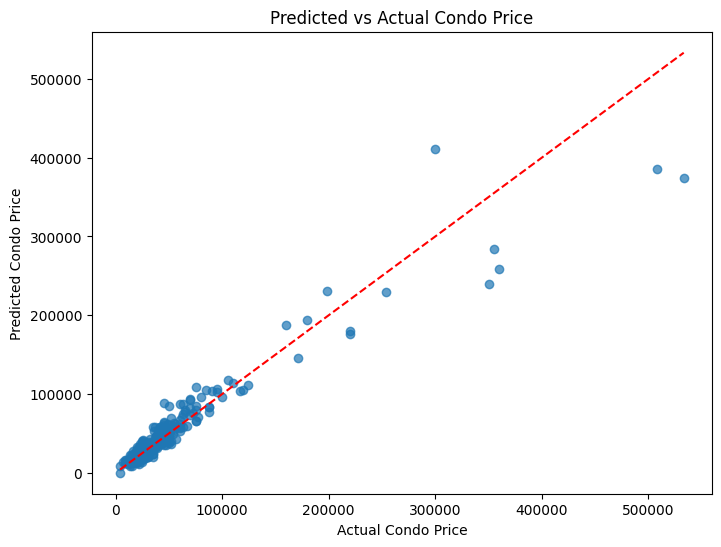

In [47]:
# Visualize predictions vs actual values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Condo Price')
plt.ylabel('Predicted Condo Price')
plt.title('Predicted vs Actual Condo Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

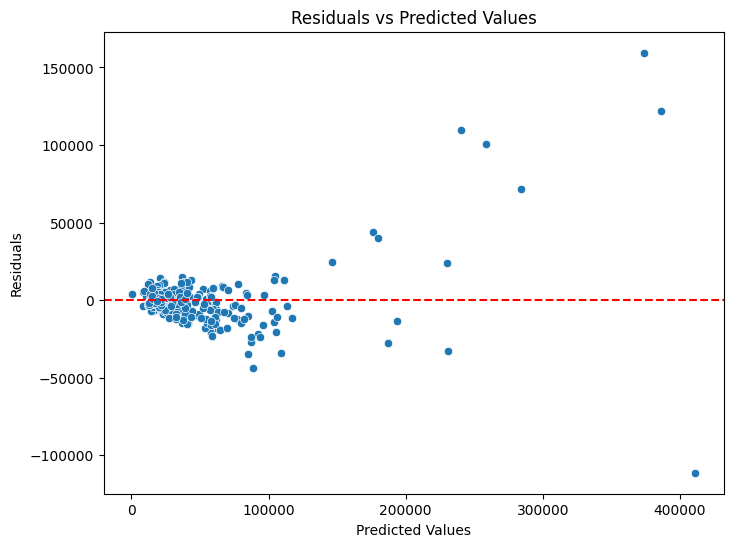

In [48]:
# Residuals plot (Residuals vs Predicted values)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

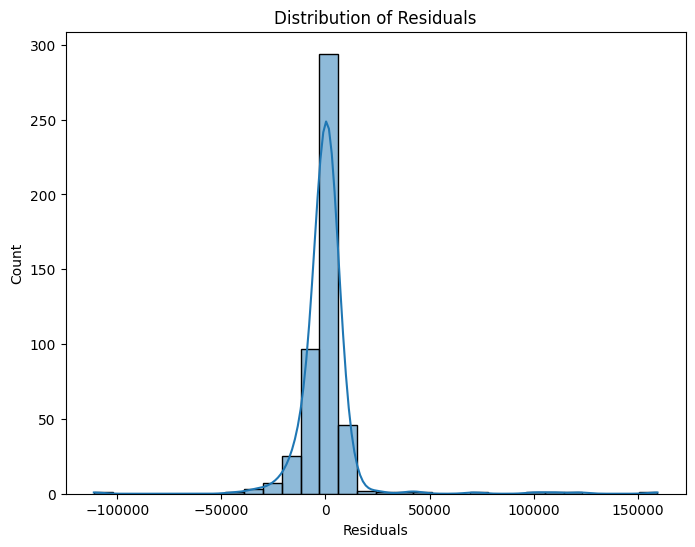

In [49]:
# Histogram of residuals
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()